In [1]:
import pandas as pd
import os
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

[Reference-1](https://stats.stackexchange.com/questions/281162/scale-a-number-between-a-range)
<br>[Reference-2](https://stackoverflow.com/questions/66809458/minmaxscaler-with-range-from-multiple-columns-in-dataframe)

In [2]:
def rescale_df(input_df):
    # min-max scaler modified to scale across all columns/features instead of each column
    min = input_df.min().min()
    max = input_df.max().max()
    norm_df = (input_df - min) / (max - min)
    return norm_df

In [3]:
wd = '/Users/Guna/ResearchProjects/CHO-Multiomics/Project-MOGONET-CHO-pH-Study'

In [4]:
os.chdir(wd)
os.getcwd()

'/Users/Guna/ResearchProjects/CHO-Multiomics/Project-MOGONET-CHO-pH-Study'

## Importing input files into dataframes

In [5]:
tx_file = '01_Tx_CHO_pH_Study.csv'
px_file = '02_Px_CHO_pH_Study.csv'
mxaq_file = '03_Mx_Aqueous_CHO_pH_Study.csv'
mxlp_file = '03_Mx_Lipid_CHO_pH_Study.csv'
tx_raw = pd.read_csv(tx_file, index_col=False)
px_raw = pd.read_csv(px_file, index_col=False)
mxaq_raw = pd.read_csv(mxaq_file, index_col=False)
mxlp_raw = pd.read_csv(mxlp_file, index_col=False)
#tx_raw.head
#tx_raw.iloc[:,0:5]
print (tx_raw.shape, px_raw.shape, mxaq_raw.shape, mxlp_raw.shape)

(8578, 169) (1513, 169) (383, 169) (149, 169)


## Cleaning up any empty rows
#### Large number of empty rows at the end of the actual contents are being read from the CSV file for some reason

In [6]:
tx_raw.dropna(how='all', inplace=True)
px_raw.dropna(how='all', inplace=True)
mxaq_raw.dropna(how='all', inplace=True)
mxlp_raw.dropna(how='all', inplace=True)
print (tx_raw.shape, px_raw.shape, mxaq_raw.shape, mxlp_raw.shape)

(8578, 169) (714, 169) (354, 169) (139, 169)


## 1. Parsing transcriptomics data

In [8]:
{tx_raw.columns.get_loc(c): c for idx, c in enumerate(tx_raw.columns)}

{0: 'Transcript cluster ID',
 1: 'gene_id',
 2: 'gene_name',
 3: 'gene_description',
 4: 'Run1_inocu',
 5: 'Run1_pH6.7_D01',
 6: 'Run1_pH6.7_D05',
 7: 'Run1_pH6.7_D08',
 8: 'Run1_pH6.7_D10',
 9: 'Run1_pH6.7_D12',
 10: 'Run1_pH6.7_D14',
 11: 'Run1_pH6.9_D01',
 12: 'Run1_pH6.9_D05',
 13: 'Run1_pH6.9_D08',
 14: 'Run1_pH6.9_D10',
 15: 'Run1_pH6.9_D12',
 16: 'Run1_pH6.9_D14',
 17: 'Run1_pH7.1_D01',
 18: 'Run1_pH7.1_D05',
 19: 'Run1_pH7.1_D08',
 20: 'Run1_pH7.1_D10',
 21: 'Run1_pH7.1_D12',
 22: 'Run1_pH7.1_D14',
 23: 'Run2_inocu',
 24: 'Run2_pH6.7_D01',
 25: 'Run2_pH6.7_D05',
 26: 'Run2_pH6.7_D08',
 27: 'Run2_pH6.7_D10',
 28: 'Run2_pH6.7_D12',
 29: 'Run2_pH6.7_D14',
 30: 'Run2_pH6.9_D01',
 31: 'Run2_pH6.9_D05',
 32: 'Run2_pH6.9_D08',
 33: 'Run2_pH6.9_D10',
 34: 'Run2_pH6.9_D12',
 35: 'Run2_pH6.9_D14',
 36: 'Run2_pH7.1_D01',
 37: 'Run2_pH7.1_D05',
 38: 'Run2_pH7.1_D08',
 39: 'Run2_pH7.1_D10',
 40: 'Run2_pH7.1_D12',
 41: 'Run2_pH7.1_D14',
 42: 'Run3_inocu',
 43: 'Run3_pH6.7_D01',
 44: 'Run3_pH

### Selecting only necessary columns & renaming the feature column
#### Including the control samples (named as "Run#_inocu") as well

In [9]:
#tx_df = tx_raw.iloc[:,np.r_[2,5:23,24:42,43:61]].copy()
tx_df = tx_raw.iloc[:,np.r_[2,4:61]].copy()
tx_df = tx_df.rename(columns={'gene_name':'Feature'})
tx_df = tx_df.set_index('Feature')
print(tx_df.shape)
tx_df.head()

(8578, 57)


,Run1_inocu,Run1_pH6.7_D01,Run1_pH6.7_D05,Run1_pH6.7_D08,Run1_pH6.7_D10,Run1_pH6.7_D12,Run1_pH6.7_D14,Run1_pH6.9_D01,Run1_pH6.9_D05,Run1_pH6.9_D08,...,Run3_pH6.9_D08,Run3_pH6.9_D10,Run3_pH6.9_D12,Run3_pH6.9_D14,Run3_pH7.1_D01,Run3_pH7.1_D05,Run3_pH7.1_D08,Run3_pH7.1_D10,Run3_pH7.1_D12,Run3_pH7.1_D14
Feature,,,,,,,,,,,,,,,,,,,,,
A4gnt,3.643412,3.406493,3.250597,3.786138,3.750861,3.985924,3.796544,3.615088,3.720579,3.485113,...,3.571385,3.596790,3.443098,3.337732,3.492969,3.431080,3.435722,3.675920,3.390544,3.644124
Aaas,8.548749,8.514895,8.355016,8.161128,7.905057,7.847086,7.767446,8.467531,8.508321,8.016535,...,8.217537,7.799620,7.969783,7.723370,8.294146,8.162646,8.302177,7.762654,7.828641,7.460578
Aacs,7.412440,7.768722,7.206194,6.902412,6.498914,6.573475,6.422894,7.641431,7.299188,6.664620,...,7.141267,6.385594,6.579957,6.495302,7.345478,6.764139,7.127171,6.149401,6.554704,5.905776
Aadac,2.210555,2.194459,2.430042,2.825765,2.637521,2.687026,2.298568,2.198933,2.342554,2.671218,...,2.444011,2.398897,2.303930,2.052712,2.102833,2.427860,2.641028,2.385769,2.808699,2.406862
Aagab,7.422531,7.434219,7.414783,7.251781,7.182255,7.071766,7.135650,7.479294,7.321055,7.309183,...,7.445852,7.118645,7.256082,7.394001,7.590806,7.312566,7.313431,6.868981,7.286124,7.096050


## Feature pre-selection

### Filtering out low-variance features (variance cut-off = 0.1 for Tx data)

In [26]:
tx_df.apply(pd.DataFrame.describe, axis=1)

,count,mean,std,min,25%,50%,75%,max
Feature,,,,,,,,
A4gnt,57.0,3.542666,0.198619,3.128935,3.419641,3.515374,3.647286,4.044199
Aaas,57.0,8.068883,0.312150,7.460578,7.799620,8.016535,8.355016,8.673065
Aacs,57.0,6.821425,0.501554,5.905776,6.495302,6.699856,7.229907,7.768722
Aadac,57.0,2.444682,0.216893,2.037046,2.255740,2.444011,2.611601,2.993795
Aagab,57.0,7.273642,0.162905,6.829377,7.159500,7.256484,7.394002,7.626497
...,...,...,...,...,...,...,...,...
Zwilch,57.0,7.105022,0.918966,5.086292,6.382913,7.318647,7.924996,8.568853
Zwint,57.0,5.971191,1.047826,3.712925,5.388970,6.223859,6.881927,7.580392
Zyg11b,57.0,8.151998,0.130850,7.899285,8.049805,8.157749,8.233258,8.442566


In [10]:
tx_df.values.min(), tx_df.values.max()

(1.381845666, 12.53911455)

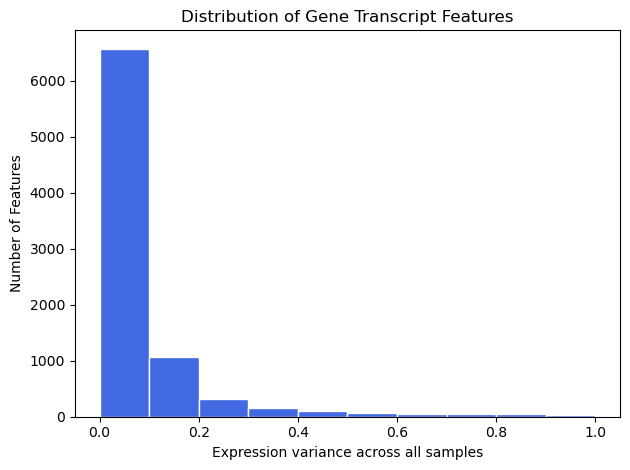

In [28]:
#tx_df.var(axis='columns').hist(range=[0.0,0.5])
plt.hist(tx_df.var(axis='columns'), range=[0,1], color="royalblue", ec='white')
plt.title('Distribution of Gene Transcript Features')
plt.xlabel('Expression variance across all samples')
plt.ylabel('Number of Features')
plt.tight_layout()
plt.savefig("CHO_Tx_Variance.png", dpi=300)

In [29]:
var_thresh = 0.1
(tx_df.var(axis='columns')>var_thresh).sum()

2002

In [30]:
tx_filt = tx_df.loc[tx_df.var(axis='columns')>var_thresh]
print(tx_filt.shape)
tx_filt

(2002, 57)


,Run1_inocu,Run1_pH6.7_D01,Run1_pH6.7_D05,Run1_pH6.7_D08,Run1_pH6.7_D10,Run1_pH6.7_D12,Run1_pH6.7_D14,Run1_pH6.9_D01,Run1_pH6.9_D05,Run1_pH6.9_D08,...,Run3_pH6.9_D08,Run3_pH6.9_D10,Run3_pH6.9_D12,Run3_pH6.9_D14,Run3_pH7.1_D01,Run3_pH7.1_D05,Run3_pH7.1_D08,Run3_pH7.1_D10,Run3_pH7.1_D12,Run3_pH7.1_D14
Feature,,,,,,,,,,,,,,,,,,,,,
Aacs,7.412440,7.768722,7.206194,6.902412,6.498914,6.573475,6.422894,7.641431,7.299188,6.664620,...,7.141267,6.385594,6.579957,6.495302,7.345478,6.764139,7.127171,6.149401,6.554704,5.905776
Abca13,3.717206,3.484866,4.095836,5.356186,5.886462,6.235715,6.500624,3.813077,4.346919,5.790922,...,5.638178,7.103077,6.607584,6.192063,3.803390,4.765297,4.971384,6.704772,6.181888,6.076980
Abcb8,5.838624,6.092709,5.734689,5.270205,5.177540,5.176899,5.234744,6.220173,5.787542,5.521959,...,5.992029,5.341835,5.409748,5.455755,6.120992,5.482675,5.832445,5.422125,5.424433,5.069846
Abcc3,7.200146,7.238291,7.275830,7.594442,7.864454,8.037301,8.010958,7.170342,7.430435,7.684637,...,7.650194,7.958482,7.734852,7.817694,6.706672,7.081887,7.330240,8.082618,7.867142,7.721335
Abcg1,3.535106,3.337744,3.573922,3.973532,4.194686,4.154100,3.809713,3.365413,3.490642,3.827250,...,3.757957,4.499077,4.223195,3.861923,3.485150,3.982782,3.408772,4.169982,4.128737,3.981188
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Znf568,6.325586,6.785423,6.526948,6.073131,6.102173,5.878772,5.684142,6.732002,6.406427,5.824876,...,6.328016,5.873126,5.995617,6.481444,6.880377,6.452211,5.770599,5.422940,6.036523,5.886031
Zranb2,7.582410,7.875698,7.953851,7.492499,7.422936,7.224789,7.264798,8.035113,7.655993,7.324388,...,7.643557,7.311481,7.424912,7.419543,8.086197,7.912140,7.711128,6.840806,7.408778,6.746574
Zscan2,4.864292,4.982367,5.341065,5.558890,5.595053,5.776443,5.770526,4.987892,5.513314,5.320177,...,5.215796,5.941550,5.302370,5.626587,4.789257,5.280707,5.614099,5.856484,5.272723,5.420794


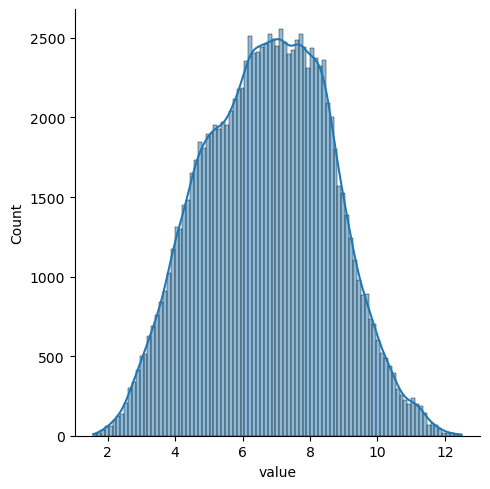

In [31]:
g = sns.displot(data=tx_filt.melt(), x='value', kde=True)

## Re-scaling the entire dataframe to [0-1]

In [32]:
tx_norm = rescale_df(tx_filt)
tx_norm.head()

,Run1_inocu,Run1_pH6.7_D01,Run1_pH6.7_D05,Run1_pH6.7_D08,Run1_pH6.7_D10,Run1_pH6.7_D12,Run1_pH6.7_D14,Run1_pH6.9_D01,Run1_pH6.9_D05,Run1_pH6.9_D08,...,Run3_pH6.9_D08,Run3_pH6.9_D10,Run3_pH6.9_D12,Run3_pH6.9_D14,Run3_pH7.1_D01,Run3_pH7.1_D05,Run3_pH7.1_D08,Run3_pH7.1_D10,Run3_pH7.1_D12,Run3_pH7.1_D14
Feature,,,,,,,,,,,,,,,,,,,,,
Aacs,0.534824,0.567432,0.515948,0.488145,0.451215,0.458039,0.444258,0.555782,0.524459,0.466381,...,0.510005,0.440844,0.458633,0.450885,0.528695,0.475490,0.508715,0.419227,0.456321,0.396930
Abca13,0.196625,0.175361,0.231279,0.346630,0.395162,0.427127,0.451372,0.205400,0.254258,0.386418,...,0.372438,0.506510,0.461161,0.423131,0.204513,0.292550,0.311411,0.470056,0.422200,0.412599
Abcb8,0.390784,0.414038,0.381271,0.338760,0.330279,0.330221,0.335515,0.425704,0.386108,0.361801,...,0.404824,0.345316,0.351532,0.355742,0.416627,0.358206,0.390218,0.352664,0.352876,0.320423
Abcc3,0.515394,0.518885,0.522321,0.551481,0.576194,0.592013,0.589602,0.512666,0.536471,0.559736,...,0.556584,0.584799,0.564332,0.571914,0.470230,0.504571,0.527301,0.596161,0.576440,0.563095
Abcg1,0.179959,0.161896,0.183511,0.220085,0.240326,0.236611,0.205092,0.164428,0.175889,0.206697,...,0.200355,0.268184,0.242935,0.209870,0.175387,0.220931,0.168396,0.238065,0.234290,0.220786


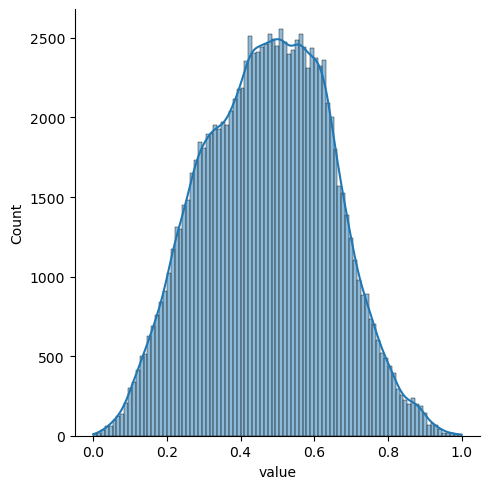

In [33]:
g = sns.displot(data=tx_norm.melt(), x='value', kde=True)

### Extracting features to create "feature_metadata" dataframe

In [34]:
feature_tx = pd.DataFrame(tx_filt.index)
feature_tx['featureID']=feature_tx['Feature']
feature_tx['featureType']='Transcriptomics'
feature_tx = feature_tx.set_index('Feature')
print(feature_tx.shape)
feature_tx.head()

(2002, 2)


,featureID,featureType
Feature,,
Aacs,Aacs,Transcriptomics
Abca13,Abca13,Transcriptomics
Abcb8,Abcb8,Transcriptomics
Abcc3,Abcc3,Transcriptomics
Abcg1,Abcg1,Transcriptomics


## 2. Parsing Proteomics data

In [35]:
{px_raw.columns.get_loc(c): c for idx, c in enumerate(px_raw.columns)}

{0: 'Protein ID',
 1: 'protein_description',
 2: 'gene_id',
 3: 'gene_name',
 4: 'Run1_inocu',
 5: 'Run1_pH6.7_D01',
 6: 'Run1_pH6.7_D05',
 7: 'Run1_pH6.7_D08',
 8: 'Run1_pH6.7_D10',
 9: 'Run1_pH6.7_D12',
 10: 'Run1_pH6.7_D14',
 11: 'Run1_pH6.9_D01',
 12: 'Run1_pH6.9_D05',
 13: 'Run1_pH6.9_D08',
 14: 'Run1_pH6.9_D10',
 15: 'Run1_pH6.9_D12',
 16: 'Run1_pH6.9_D14',
 17: 'Run1_pH7.1_D01',
 18: 'Run1_pH7.1_D05',
 19: 'Run1_pH7.1_D08',
 20: 'Run1_pH7.1_D10',
 21: 'Run1_pH7.1_D12',
 22: 'Run1_pH7.1_D14',
 23: 'Run2_inocu',
 24: 'Run2_pH6.7_D01',
 25: 'Run2_pH6.7_D05',
 26: 'Run2_pH6.7_D08',
 27: 'Run2_pH6.7_D10',
 28: 'Run2_pH6.7_D12',
 29: 'Run2_pH6.7_D14',
 30: 'Run2_pH6.9_D01',
 31: 'Run2_pH6.9_D05',
 32: 'Run2_pH6.9_D08',
 33: 'Run2_pH6.9_D10',
 34: 'Run2_pH6.9_D12',
 35: 'Run2_pH6.9_D14',
 36: 'Run2_pH7.1_D01',
 37: 'Run2_pH7.1_D05',
 38: 'Run2_pH7.1_D08',
 39: 'Run2_pH7.1_D10',
 40: 'Run2_pH7.1_D12',
 41: 'Run2_pH7.1_D14',
 42: 'Run3_inocu',
 43: 'Run3_pH6.7_D01',
 44: 'Run3_pH6.7_D05'

## Updating feature name for proteins (Gene name + protein ID), so we can tell them apart from Tx features (Gene name)

In [36]:
px_raw['gene_name'] = px_raw['gene_name'] + '_' + px_raw['Protein ID']
px_raw.head(5)

,Protein ID,protein_description,gene_id,gene_name,Run1_inocu,Run1_pH6.7_D01,Run1_pH6.7_D05,Run1_pH6.7_D08,Run1_pH6.7_D10,Run1_pH6.7_D12,...,DiffExp.pH6.9_D08.inocu,DiffExp.pH6.9_D10.inocu,DiffExp.pH6.9_D12.inocu,DiffExp.pH6.9_D14.inocu,DiffExp.pH7.1_D01.inocu,DiffExp.pH7.1_D05.inocu,DiffExp.pH7.1_D08.inocu,DiffExp.pH7.1_D10.inocu,DiffExp.pH7.1_D12.inocu,DiffExp.pH7.1_D14.inocu
0,XP_007634482.1,"PREDICTED: alanine--tRNA ligase, cytoplasmic [...",100766178.0,Aars_XP_007634482.1,11.016575,10.965937,11.008511,11.245352,11.176862,11.122470,...,none,none,none,none,none,none,up,up,up,up
1,XP_016825696.1,PREDICTED: ATP-binding cassette sub-family D m...,100765314.0,Abcd3_XP_016825696.1,9.239554,9.269875,9.289881,9.328762,9.434942,9.608691,...,none,up,up,up,none,none,none,up,up,up
2,XP_016822125.1,PREDICTED: ATP-binding cassette sub-family F m...,100765933.0,Abcf1_XP_016822125.1,9.645624,9.588203,9.618382,9.706473,9.649975,9.650172,...,none,none,none,none,none,none,none,none,up,up
3,XP_007637856.1,PREDICTED: acyl-CoA dehydrogenase family membe...,100763073.0,Acad11_XP_007637856.1,7.628513,7.543100,7.511426,7.564925,7.599515,7.623147,...,none,up,up,up,none,none,none,none,up,up
4,XP_007607021.1,PREDICTED: long-chain specific acyl-CoA dehydr...,100759026.0,Acadl_XP_007607021.1,10.154194,10.226728,10.271058,10.150143,10.144006,10.311401,...,none,none,none,none,none,none,none,none,none,up


### Selecting only necessary columns & renaming the feature column
#### Including the control samples (named as "Run#_inocu") as well

In [37]:
#px_df = px_raw.iloc[:,np.r_[3,5:23,24:42,43:61]].copy()
px_df = px_raw.iloc[:,np.r_[3:61]].copy()
px_df = px_df.rename(columns={'gene_name':'Feature'})
px_df = px_df.set_index('Feature')
print(px_df.shape)
px_df.head()

(714, 57)


,Run1_inocu,Run1_pH6.7_D01,Run1_pH6.7_D05,Run1_pH6.7_D08,Run1_pH6.7_D10,Run1_pH6.7_D12,Run1_pH6.7_D14,Run1_pH6.9_D01,Run1_pH6.9_D05,Run1_pH6.9_D08,...,Run3_pH6.9_D08,Run3_pH6.9_D10,Run3_pH6.9_D12,Run3_pH6.9_D14,Run3_pH7.1_D01,Run3_pH7.1_D05,Run3_pH7.1_D08,Run3_pH7.1_D10,Run3_pH7.1_D12,Run3_pH7.1_D14
Feature,,,,,,,,,,,,,,,,,,,,,
Aars_XP_007634482.1,11.016575,10.965937,11.008511,11.245352,11.176862,11.122470,11.130648,10.901745,10.971423,11.263546,...,11.161382,11.169328,11.219668,11.256612,11.092545,11.375281,11.513182,11.426062,11.413558,11.420343
Abcd3_XP_016825696.1,9.239554,9.269875,9.289881,9.328762,9.434942,9.608691,9.598687,9.197455,9.202262,9.273553,...,9.436363,9.574434,9.605632,9.605297,9.345252,9.354472,9.409400,9.570489,9.642762,9.631946
Abcf1_XP_016822125.1,9.645624,9.588203,9.618382,9.706473,9.649975,9.650172,9.597979,9.637224,9.544843,9.627188,...,9.643479,9.675619,9.684384,9.700196,9.599699,9.604657,9.640080,9.710515,9.721842,9.763502
Acad11_XP_007637856.1,7.628513,7.543100,7.511426,7.564925,7.599515,7.623147,7.666290,7.642388,7.649345,7.654504,...,7.680939,7.715146,7.727862,7.787742,7.606243,7.664251,7.722416,7.727667,7.764759,7.751657
Acadl_XP_007607021.1,10.154194,10.226728,10.271058,10.150143,10.144006,10.311401,10.339475,10.125784,10.134230,10.060742,...,10.266635,10.419734,10.393025,10.425182,10.131042,10.163727,10.189231,10.333801,10.395247,10.460909


In [38]:
px_df.apply(pd.DataFrame.describe, axis=1)

,count,mean,std,min,25%,50%,75%,max
Feature,,,,,,,,
Aars_XP_007634482.1,57.0,11.158996,0.147568,10.876575,11.055628,11.176862,11.256612,11.513182
Abcd3_XP_016825696.1,57.0,9.406600,0.128337,9.197455,9.300123,9.403534,9.499624,9.642762
Abcf1_XP_016822125.1,57.0,9.677741,0.081778,9.544843,9.620959,9.666950,9.706573,9.933074
Acad11_XP_007637856.1,57.0,7.642867,0.070362,7.497185,7.601044,7.644353,7.691250,7.787742
Acadl_XP_007607021.1,57.0,10.229824,0.104416,10.060742,10.142701,10.210315,10.314396,10.460909
...,...,...,...,...,...,...,...,...
Xpnpep1_XP_016822027.1,57.0,8.397654,0.107959,8.203889,8.320278,8.379738,8.469353,8.716494
Xpo5_XP_007631148.1,57.0,8.147831,0.161818,7.876950,8.012382,8.130779,8.249991,8.584957
Yars_XP_007637101.1,57.0,9.828331,0.238801,9.427908,9.617482,9.854453,10.004963,10.257638


In [39]:
px_df.values.min(), px_df.values.max()

(7.269791471, 15.17781983)

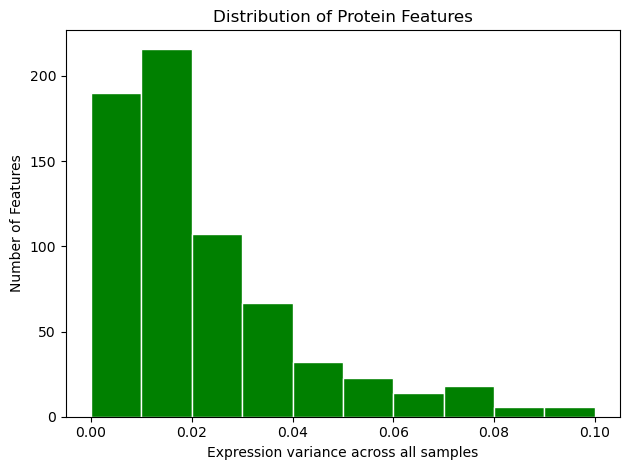

In [41]:
plt.hist(px_df.var(axis='columns'), range=[0,0.1], color="green", ec='white')
plt.title('Distribution of Protein Features')
plt.xlabel('Expression variance across all samples')
plt.ylabel('Number of Features')
plt.tight_layout()
plt.savefig("CHO_Px_Variance.png", dpi=300)

## Feature pre-selection

### Filtering out low-variance features (variance cut-off = 0.01 for Px data)

In [42]:
var_thresh = 0.01
(px_df.var(axis='columns')>var_thresh).sum()

524

In [43]:
px_filt = px_df.loc[px_df.var(axis='columns')>var_thresh]
print(px_filt.shape)
px_filt

(524, 57)


,Run1_inocu,Run1_pH6.7_D01,Run1_pH6.7_D05,Run1_pH6.7_D08,Run1_pH6.7_D10,Run1_pH6.7_D12,Run1_pH6.7_D14,Run1_pH6.9_D01,Run1_pH6.9_D05,Run1_pH6.9_D08,...,Run3_pH6.9_D08,Run3_pH6.9_D10,Run3_pH6.9_D12,Run3_pH6.9_D14,Run3_pH7.1_D01,Run3_pH7.1_D05,Run3_pH7.1_D08,Run3_pH7.1_D10,Run3_pH7.1_D12,Run3_pH7.1_D14
Feature,,,,,,,,,,,,,,,,,,,,,
Aars_XP_007634482.1,11.016575,10.965937,11.008511,11.245352,11.176862,11.122470,11.130648,10.901745,10.971423,11.263546,...,11.161382,11.169328,11.219668,11.256612,11.092545,11.375281,11.513182,11.426062,11.413558,11.420343
Abcd3_XP_016825696.1,9.239554,9.269875,9.289881,9.328762,9.434942,9.608691,9.598687,9.197455,9.202262,9.273553,...,9.436363,9.574434,9.605632,9.605297,9.345252,9.354472,9.409400,9.570489,9.642762,9.631946
Acadl_XP_007607021.1,10.154194,10.226728,10.271058,10.150143,10.144006,10.311401,10.339475,10.125784,10.134230,10.060742,...,10.266635,10.419734,10.393025,10.425182,10.131042,10.163727,10.189231,10.333801,10.395247,10.460909
Acin1_XP_007609291.2,8.675316,8.699765,8.756325,8.647937,8.550243,8.486308,8.360590,8.705817,8.721849,8.606315,...,8.475666,8.419849,8.475216,8.454220,8.657449,8.557984,8.428111,8.339220,8.282376,8.213309
Acly_XP_016827526.1,11.387561,11.545306,11.436635,11.339576,11.297444,11.234419,11.175012,11.518743,11.202100,11.116545,...,11.123334,11.100015,11.078420,11.042407,11.492124,11.351171,11.391882,11.402219,11.365117,11.334855
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Wbp2_XP_016822722.1,8.367293,8.316837,8.277403,8.305553,8.382881,8.357947,8.357926,8.558557,8.552080,8.383410,...,8.363855,8.249807,8.217128,8.154618,8.545972,8.412755,8.387102,8.290047,8.233367,8.237695
Xpnpep1_XP_016822027.1,8.284607,8.320278,8.307830,8.358250,8.472130,8.419091,8.477843,8.237086,8.213987,8.273449,...,8.447572,8.512510,8.603138,8.716494,8.267408,8.382390,8.460592,8.443922,8.503078,8.431403
Xpo5_XP_007631148.1,8.335401,8.276286,8.169899,8.130779,8.007852,7.977242,7.939270,8.335901,8.360541,8.218386,...,8.016754,8.040962,8.020505,8.033103,8.205551,8.124435,8.043261,7.980104,7.949419,7.904019


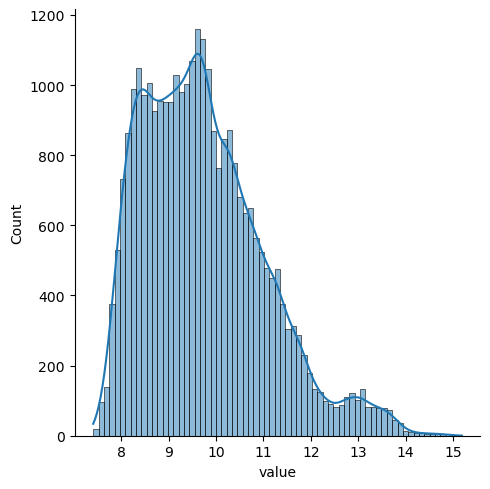

In [44]:
g = sns.displot(data=px_filt.melt(), x='value', kde=True)

## Re-scaling the entire dataframe to [0-1]

In [45]:
px_norm = rescale_df(px_filt)

In [46]:
px_norm.head()

,Run1_inocu,Run1_pH6.7_D01,Run1_pH6.7_D05,Run1_pH6.7_D08,Run1_pH6.7_D10,Run1_pH6.7_D12,Run1_pH6.7_D14,Run1_pH6.9_D01,Run1_pH6.9_D05,Run1_pH6.9_D08,...,Run3_pH6.9_D08,Run3_pH6.9_D10,Run3_pH6.9_D12,Run3_pH6.9_D14,Run3_pH7.1_D01,Run3_pH7.1_D05,Run3_pH7.1_D08,Run3_pH7.1_D10,Run3_pH7.1_D12,Run3_pH7.1_D14
Feature,,,,,,,,,,,,,,,,,,,,,
Aars_XP_007634482.1,0.464370,0.457852,0.463332,0.493818,0.485002,0.478000,0.479053,0.449589,0.458558,0.496160,...,0.483009,0.484032,0.490512,0.495267,0.474148,0.510542,0.528292,0.517078,0.515469,0.516342
Abcd3_XP_016825696.1,0.235634,0.239537,0.242112,0.247117,0.260784,0.283149,0.281861,0.230215,0.230834,0.240010,...,0.260967,0.278739,0.282755,0.282712,0.249239,0.250426,0.257496,0.278231,0.287534,0.286142
Acadl_XP_007607021.1,0.353365,0.362702,0.368408,0.352844,0.352054,0.373601,0.377214,0.349708,0.350795,0.341336,...,0.367838,0.387545,0.384107,0.388246,0.350385,0.354592,0.357875,0.376484,0.384393,0.392845
Acin1_XP_007609291.2,0.163006,0.166153,0.173433,0.159482,0.146906,0.138677,0.122495,0.166932,0.168995,0.154124,...,0.137307,0.130122,0.137249,0.134547,0.160706,0.147903,0.131186,0.119744,0.112427,0.103537
Acly_XP_016827526.1,0.512123,0.532427,0.518439,0.505946,0.500523,0.492410,0.484764,0.529008,0.488250,0.477238,...,0.478112,0.475110,0.472330,0.467695,0.525582,0.507438,0.512679,0.514009,0.509234,0.505338


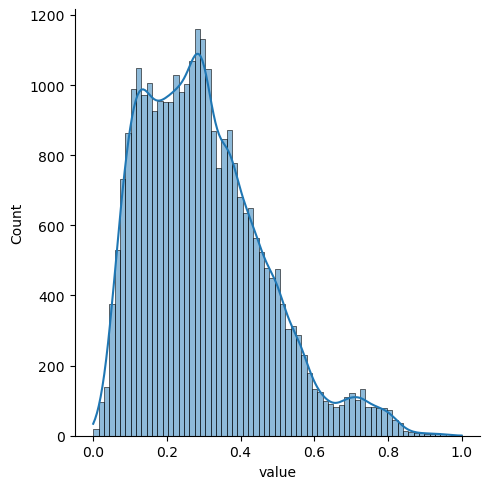

In [47]:
g = sns.displot(data=px_norm.melt(), x='value', kde=True)

### Extracting features to create "feature_metadata" dataframe

In [48]:
feature_px = pd.DataFrame(px_filt.index)
feature_px['featureID']=feature_px['Feature']
feature_px['featureType']='Proteomics'
feature_px = feature_px.set_index('Feature')
print(feature_px.shape)
feature_px.head()

(524, 2)


,featureID,featureType
Feature,,
Aars_XP_007634482.1,Aars_XP_007634482.1,Proteomics
Abcd3_XP_016825696.1,Abcd3_XP_016825696.1,Proteomics
Acadl_XP_007607021.1,Acadl_XP_007607021.1,Proteomics
Acin1_XP_007609291.2,Acin1_XP_007609291.2,Proteomics
Acly_XP_016827526.1,Acly_XP_016827526.1,Proteomics


## 3. Parsing Metabolomics data

In [49]:
print(mxaq_raw.shape)
{mxaq_raw.columns.get_loc(c): c for idx, c in enumerate(mxaq_raw.columns)}

(354, 169)


{0: 'ID',
 1: 'name',
 2: 'm/z',
 3: 'RT(min)',
 4: 'Run1_inocu',
 5: 'Run1_pH6.7_D01',
 6: 'Run1_pH6.7_D05',
 7: 'Run1_pH6.7_D08',
 8: 'Run1_pH6.7_D10',
 9: 'Run1_pH6.7_D12',
 10: 'Run1_pH6.7_D14',
 11: 'Run1_pH6.9_D01',
 12: 'Run1_pH6.9_D05',
 13: 'Run1_pH6.9_D08',
 14: 'Run1_pH6.9_D10',
 15: 'Run1_pH6.9_D12',
 16: 'Run1_pH6.9_D14',
 17: 'Run1_pH7.1_D01',
 18: 'Run1_pH7.1_D05',
 19: 'Run1_pH7.1_D08',
 20: 'Run1_pH7.1_D10',
 21: 'Run1_pH7.1_D12',
 22: 'Run1_pH7.1_D14',
 23: 'Run2_inocu',
 24: 'Run2_pH6.7_D01',
 25: 'Run2_pH6.7_D05',
 26: 'Run2_pH6.7_D08',
 27: 'Run2_pH6.7_D10',
 28: 'Run2_pH6.7_D12',
 29: 'Run2_pH6.7_D14',
 30: 'Run2_pH6.9_D01',
 31: 'Run2_pH6.9_D05',
 32: 'Run2_pH6.9_D08',
 33: 'Run2_pH6.9_D10',
 34: 'Run2_pH6.9_D12',
 35: 'Run2_pH6.9_D14',
 36: 'Run2_pH7.1_D01',
 37: 'Run2_pH7.1_D05',
 38: 'Run2_pH7.1_D08',
 39: 'Run2_pH7.1_D10',
 40: 'Run2_pH7.1_D12',
 41: 'Run2_pH7.1_D14',
 42: 'Run3_inocu',
 43: 'Run3_pH6.7_D01',
 44: 'Run3_pH6.7_D05',
 45: 'Run3_pH6.7_D08',
 46:

In [50]:
print(mxlp_raw.shape)
{mxlp_raw.columns.get_loc(c): c for idx, c in enumerate(mxlp_raw.columns)}

(139, 169)


{0: 'ID',
 1: 'name',
 2: 'm/z',
 3: 'RT(min)',
 4: 'Run1_inocu',
 5: 'Run1_pH6.7_D01',
 6: 'Run1_pH6.7_D05',
 7: 'Run1_pH6.7_D08',
 8: 'Run1_pH6.7_D10',
 9: 'Run1_pH6.7_D12',
 10: 'Run1_pH6.7_D14',
 11: 'Run1_pH6.9_D01',
 12: 'Run1_pH6.9_D05',
 13: 'Run1_pH6.9_D08',
 14: 'Run1_pH6.9_D10',
 15: 'Run1_pH6.9_D12',
 16: 'Run1_pH6.9_D14',
 17: 'Run1_pH7.1_D01',
 18: 'Run1_pH7.1_D05',
 19: 'Run1_pH7.1_D08',
 20: 'Run1_pH7.1_D10',
 21: 'Run1_pH7.1_D12',
 22: 'Run1_pH7.1_D14',
 23: 'Run2_inocu',
 24: 'Run2_pH6.7_D01',
 25: 'Run2_pH6.7_D05',
 26: 'Run2_pH6.7_D08',
 27: 'Run2_pH6.7_D10',
 28: 'Run2_pH6.7_D12',
 29: 'Run2_pH6.7_D14',
 30: 'Run2_pH6.9_D01',
 31: 'Run2_pH6.9_D05',
 32: 'Run2_pH6.9_D08',
 33: 'Run2_pH6.9_D10',
 34: 'Run2_pH6.9_D12',
 35: 'Run2_pH6.9_D14',
 36: 'Run2_pH7.1_D01',
 37: 'Run2_pH7.1_D05',
 38: 'Run2_pH7.1_D08',
 39: 'Run2_pH7.1_D10',
 40: 'Run2_pH7.1_D12',
 41: 'Run2_pH7.1_D14',
 42: 'Run3_inocu',
 43: 'Run3_pH6.7_D01',
 44: 'Run3_pH6.7_D05',
 45: 'Run3_pH6.7_D08',
 46:

In [51]:
(mxaq_raw.columns == mxlp_raw.columns).sum()

169

### Merging both aqueous and lipid metabolites into one dataset/table

In [52]:
mx_raw = pd.concat([mxaq_raw, mxlp_raw], ignore_index=True, sort=False)
print(mx_raw.shape)
mx_raw

(493, 169)


,ID,name,m/z,RT(min),Run1_inocu,Run1_pH6.7_D01,Run1_pH6.7_D05,Run1_pH6.7_D08,Run1_pH6.7_D10,Run1_pH6.7_D12,...,DiffExp.pH6.9_D08.inocu,DiffExp.pH6.9_D10.inocu,DiffExp.pH6.9_D12.inocu,DiffExp.pH6.9_D14.inocu,DiffExp.pH7.1_D01.inocu,DiffExp.pH7.1_D05.inocu,DiffExp.pH7.1_D08.inocu,DiffExp.pH7.1_D10.inocu,DiffExp.pH7.1_D12.inocu,DiffExp.pH7.1_D14.inocu
0,AqPos.M207T30,2-Methylcitric acid,207.050495,0.500823,20.499075,20.697241,21.354430,21.567641,21.448535,21.391825,...,up,up,up,up,none,up,up,up,up,up
1,AqPos.M227T31,Carnosine,227.115421,0.520206,15.790973,16.075588,15.966705,16.230418,16.576609,17.309277,...,none,up,up,up,none,none,none,up,up,up
2,AqPos.M347T32_2,Muscomin,347.115612,0.527831,17.094986,17.733053,16.486018,16.789507,17.150049,17.736295,...,down,none,none,none,none,down,down,none,none,none
3,AqPos.M179T32,4-Oxo-4-(3-pyridyl)-butanamide,179.083256,0.529053,18.466155,17.678905,18.995134,19.285010,19.404394,19.346832,...,up,up,up,up,none,up,up,up,up,up
4,AqPos.M156T32,Histidine,156.075980,0.531447,24.444553,25.119339,24.929553,24.932191,24.963126,24.973811,...,none,up,up,up,none,up,up,up,up,up
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
488,LpNeg.M871T495_1,GlcCer(d18:1/24:0),870.704269,8.248322,17.262684,16.502892,17.329818,17.201126,17.762153,17.445208,...,up,none,none,down,down,none,none,down,down,down
489,LpNeg.M888T394_1,PI 38:3,887.566697,6.558921,14.678471,16.008039,16.190766,16.782644,17.357523,18.031186,...,up,up,up,up,up,none,up,up,up,up
490,LpNeg.M890T416_1,PI 38:2,889.582169,6.925511,16.090472,17.145197,17.474058,17.988741,18.882583,19.481467,...,up,up,up,up,up,up,up,up,up,up
491,LpNeg.M931T511,PC 42:1,930.717236,8.519566,14.068539,13.176270,13.472633,13.444418,13.098166,12.403221,...,none,down,down,down,down,none,none,down,down,down


### Selecting only necessary columns & renaming the feature column
#### Including the control samples (named as "Run#_inocu") as well

In [53]:
#mx_df = mx_raw.iloc[:,np.r_[0,5:23,24:42,43:61]].copy()
mx_df = mx_raw.iloc[:,np.r_[0,4:61]].copy()
mx_df = mx_df.rename(columns={'ID':'Feature'})
mx_df = mx_df.set_index('Feature')
print(mx_df.shape)
mx_df.head()

(493, 57)


,Run1_inocu,Run1_pH6.7_D01,Run1_pH6.7_D05,Run1_pH6.7_D08,Run1_pH6.7_D10,Run1_pH6.7_D12,Run1_pH6.7_D14,Run1_pH6.9_D01,Run1_pH6.9_D05,Run1_pH6.9_D08,...,Run3_pH6.9_D08,Run3_pH6.9_D10,Run3_pH6.9_D12,Run3_pH6.9_D14,Run3_pH7.1_D01,Run3_pH7.1_D05,Run3_pH7.1_D08,Run3_pH7.1_D10,Run3_pH7.1_D12,Run3_pH7.1_D14
Feature,,,,,,,,,,,,,,,,,,,,,
AqPos.M207T30,20.499075,20.697241,21.354430,21.567641,21.448535,21.391825,21.355535,20.422047,21.212795,21.584701,...,21.435918,21.447361,21.309494,21.502512,20.625402,21.577899,21.614777,21.698703,21.917695,21.774079
AqPos.M227T31,15.790973,16.075588,15.966705,16.230418,16.576609,17.309277,17.512594,15.929574,15.826887,16.883102,...,15.957230,16.721129,17.900471,17.781345,16.365490,16.267203,16.168638,17.484954,18.250286,18.110090
AqPos.M347T32_2,17.094986,17.733053,16.486018,16.789507,17.150049,17.736295,17.849427,19.244388,15.993398,17.385914,...,16.953183,17.797122,17.367250,18.104913,18.719625,16.733641,17.007094,17.425669,18.257532,17.707753
AqPos.M179T32,18.466155,17.678905,18.995134,19.285010,19.404394,19.346832,19.222523,18.534476,19.190903,19.114335,...,19.378487,19.344737,19.313848,18.924818,17.877663,18.710878,19.573104,19.428851,19.229999,19.527289
AqPos.M156T32,24.444553,25.119339,24.929553,24.932191,24.963126,24.973811,25.107107,24.456496,24.887733,25.148794,...,24.972993,25.125166,25.103480,25.412905,25.146712,25.335637,25.238223,25.376302,25.754751,25.594888


In [54]:
mx_df.apply(pd.DataFrame.describe, axis=1)

,count,mean,std,min,25%,50%,75%,max
Feature,,,,,,,,
AqPos.M207T30,57.0,21.282781,0.404397,20.422047,21.212795,21.374732,21.564654,21.917695
AqPos.M227T31,57.0,16.838285,0.849540,15.723987,16.075588,16.578388,17.599499,18.342974
AqPos.M347T32_2,57.0,17.532962,0.825620,15.937774,16.953183,17.419451,18.104913,19.341745
AqPos.M179T32,57.0,19.008446,0.534119,17.670669,18.930908,19.211801,19.349920,19.732085
AqPos.M156T32,57.0,25.086533,0.304189,24.444553,24.908132,25.051437,25.238223,25.754751
...,...,...,...,...,...,...,...,...
LpNeg.M871T495_1,57.0,17.111977,0.426635,16.171084,16.863492,17.228413,17.459739,17.762153
LpNeg.M888T394_1,57.0,16.992738,1.182449,14.678471,16.048144,16.819686,18.075616,18.808343
LpNeg.M890T416_1,57.0,18.607204,1.324358,16.090472,17.427628,18.742930,19.760611,20.599603


In [55]:
mx_df.values.min(), mx_df.values.max()

(8.591388685, 31.66388271)

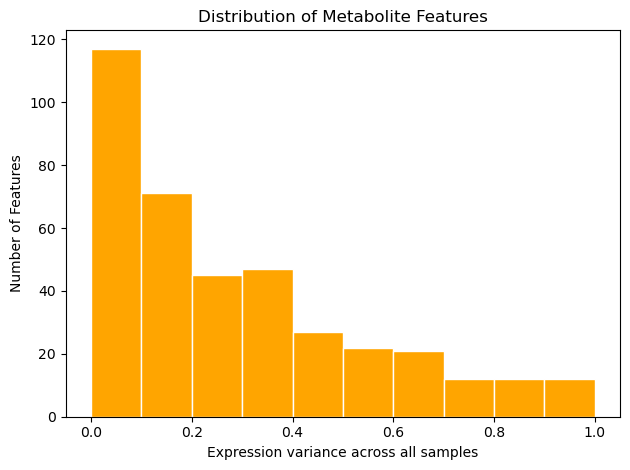

In [56]:
plt.hist(mx_df.var(axis='columns'), range=[0,1], color="orange", ec='white')
plt.title('Distribution of Metabolite Features')
plt.xlabel('Expression variance across all samples')
plt.ylabel('Number of Features')
plt.tight_layout()
plt.savefig("CHO_Mx_Variance.png", dpi=300)

## Feature pre-selection

### Filtering out low-variance features (variance cut-off = 0.1 for Mx data)

In [57]:
var_thresh = 0.1
(mx_df.var(axis='columns')>var_thresh).sum()

376

In [58]:
mx_filt = mx_df.loc[mx_df.var(axis='columns')>var_thresh]
print(mx_filt.shape)
mx_filt

(376, 57)


,Run1_inocu,Run1_pH6.7_D01,Run1_pH6.7_D05,Run1_pH6.7_D08,Run1_pH6.7_D10,Run1_pH6.7_D12,Run1_pH6.7_D14,Run1_pH6.9_D01,Run1_pH6.9_D05,Run1_pH6.9_D08,...,Run3_pH6.9_D08,Run3_pH6.9_D10,Run3_pH6.9_D12,Run3_pH6.9_D14,Run3_pH7.1_D01,Run3_pH7.1_D05,Run3_pH7.1_D08,Run3_pH7.1_D10,Run3_pH7.1_D12,Run3_pH7.1_D14
Feature,,,,,,,,,,,,,,,,,,,,,
AqPos.M207T30,20.499075,20.697241,21.354430,21.567641,21.448535,21.391825,21.355535,20.422047,21.212795,21.584701,...,21.435918,21.447361,21.309494,21.502512,20.625402,21.577899,21.614777,21.698703,21.917695,21.774079
AqPos.M227T31,15.790973,16.075588,15.966705,16.230418,16.576609,17.309277,17.512594,15.929574,15.826887,16.883102,...,15.957230,16.721129,17.900471,17.781345,16.365490,16.267203,16.168638,17.484954,18.250286,18.110090
AqPos.M347T32_2,17.094986,17.733053,16.486018,16.789507,17.150049,17.736295,17.849427,19.244388,15.993398,17.385914,...,16.953183,17.797122,17.367250,18.104913,18.719625,16.733641,17.007094,17.425669,18.257532,17.707753
AqPos.M179T32,18.466155,17.678905,18.995134,19.285010,19.404394,19.346832,19.222523,18.534476,19.190903,19.114335,...,19.378487,19.344737,19.313848,18.924818,17.877663,18.710878,19.573104,19.428851,19.229999,19.527289
AqPos.M213T32,21.399106,20.667819,22.090293,22.110960,22.107319,22.095385,21.969309,20.358207,21.822400,22.217605,...,22.096983,22.167443,21.921272,21.997686,20.388309,22.206137,22.158974,22.038533,22.137645,21.854124
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
LpNeg.M871T495_1,17.262684,16.502892,17.329818,17.201126,17.762153,17.445208,17.470860,16.578265,17.548639,17.614870,...,17.695399,17.540696,17.349813,17.021510,16.880396,17.614820,17.266000,16.868261,16.511689,16.190061
LpNeg.M888T394_1,14.678471,16.008039,16.190766,16.782644,17.357523,18.031186,18.416890,16.048144,15.781470,16.528259,...,16.717166,17.620779,18.309133,18.547745,15.581451,14.869429,16.435365,17.729888,18.254109,18.290554
LpNeg.M890T416_1,16.090472,17.145197,17.474058,17.988741,18.882583,19.481467,19.827710,17.179648,17.467804,18.503679,...,18.521935,19.228514,19.840255,20.088929,16.815363,16.627702,18.674734,19.751871,20.214245,20.499975


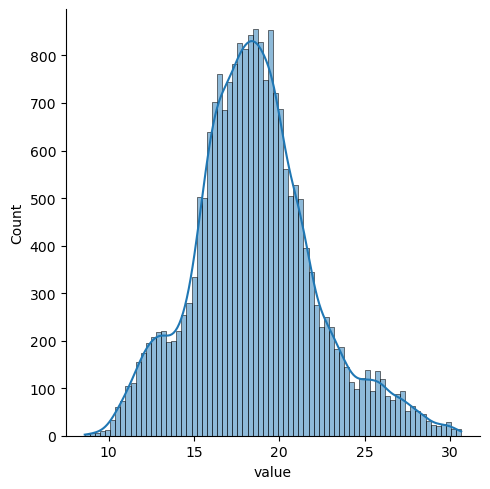

In [59]:
g = sns.displot(data=mx_filt.melt(), x='value', kde=True)

## Re-scaling the entire dataframe to [0-1]

In [60]:
mx_norm = rescale_df(mx_filt)
mx_norm.head()

,Run1_inocu,Run1_pH6.7_D01,Run1_pH6.7_D05,Run1_pH6.7_D08,Run1_pH6.7_D10,Run1_pH6.7_D12,Run1_pH6.7_D14,Run1_pH6.9_D01,Run1_pH6.9_D05,Run1_pH6.9_D08,...,Run3_pH6.9_D08,Run3_pH6.9_D10,Run3_pH6.9_D12,Run3_pH6.9_D14,Run3_pH7.1_D01,Run3_pH7.1_D05,Run3_pH7.1_D08,Run3_pH7.1_D10,Run3_pH7.1_D12,Run3_pH7.1_D14
Feature,,,,,,,,,,,,,,,,,,,,,
AqPos.M207T30,0.539655,0.548636,0.578419,0.588082,0.582684,0.580114,0.578469,0.536164,0.572000,0.588855,...,0.582112,0.582631,0.576383,0.585130,0.545380,0.588547,0.590218,0.594022,0.603946,0.597438
AqPos.M227T31,0.326284,0.339183,0.334248,0.346200,0.361889,0.395094,0.404308,0.332566,0.327912,0.375779,...,0.333819,0.368439,0.421886,0.416488,0.352321,0.347867,0.343400,0.403055,0.437740,0.431386
AqPos.M347T32_2,0.385382,0.414299,0.357784,0.371538,0.387877,0.414446,0.419573,0.482792,0.335458,0.398567,...,0.378955,0.417203,0.397721,0.431152,0.459010,0.369006,0.381399,0.400368,0.438068,0.413152
AqPos.M179T32,0.447523,0.411845,0.471496,0.484633,0.490044,0.487435,0.481802,0.450619,0.480369,0.476899,...,0.488870,0.487340,0.485940,0.468310,0.420853,0.458614,0.497690,0.491152,0.482140,0.495614
AqPos.M213T32,0.580444,0.547302,0.611769,0.612705,0.612540,0.611999,0.606286,0.533271,0.599628,0.617538,...,0.612072,0.615265,0.604108,0.607572,0.534635,0.617019,0.614881,0.609423,0.613914,0.601065


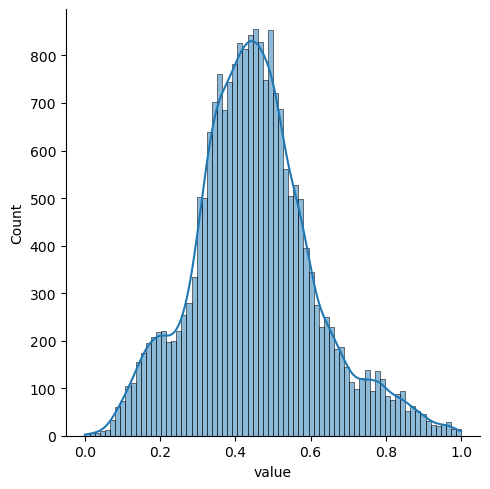

In [61]:
g = sns.displot(data=mx_norm.melt(), x='value', kde=True)

In [62]:
feature_mx = pd.DataFrame(mx_filt.index)
feature_mx['featureID']=feature_mx['Feature']
feature_mx['featureType']='Metabolomics'
feature_mx = feature_mx.set_index('Feature')
print(feature_mx.shape)
feature_mx.head()

(376, 2)


,featureID,featureType
Feature,,
AqPos.M207T30,AqPos.M207T30,Metabolomics
AqPos.M227T31,AqPos.M227T31,Metabolomics
AqPos.M347T32_2,AqPos.M347T32_2,Metabolomics
AqPos.M179T32,AqPos.M179T32,Metabolomics
AqPos.M213T32,AqPos.M213T32,Metabolomics


## Concatenating multiple omics data into single "feature_metadata" and "feature_table" dataframes. And saving to files.
[Reference](http://htmlpreview.github.io/?https://github.com/himelmallick/IntegratedLearner/blob/master/vignettes/IntegratedLearner.html)

### feature_metadata

In [63]:
feature_metadata = pd.concat([feature_tx, feature_px, feature_mx], sort=False)
print(feature_metadata.shape)
feature_metadata

(2902, 2)


,featureID,featureType
Feature,,
Aacs,Aacs,Transcriptomics
Abca13,Abca13,Transcriptomics
Abcb8,Abcb8,Transcriptomics
Abcc3,Abcc3,Transcriptomics
Abcg1,Abcg1,Transcriptomics
...,...,...
LpNeg.M871T495_1,LpNeg.M871T495_1,Metabolomics
LpNeg.M888T394_1,LpNeg.M888T394_1,Metabolomics
LpNeg.M890T416_1,LpNeg.M890T416_1,Metabolomics


In [64]:
feature_metadata.groupby(['featureType']).count()

,featureID
featureType,
Metabolomics,376
Proteomics,524
Transcriptomics,2002


In [65]:
feature_metadata.to_csv('./R-Integrated-Learner/Input-CHO/with_control_samples/feature_metadata_filt.csv',index=True)

### feature_table

In [66]:
print((tx_df.columns == px_df.columns).sum())
print((mx_df.columns == px_df.columns).sum())

57
57


In [67]:
feature_table = pd.concat([tx_filt, px_filt, mx_filt], sort=False)
print(feature_table.shape)
feature_table

(2902, 57)


,Run1_inocu,Run1_pH6.7_D01,Run1_pH6.7_D05,Run1_pH6.7_D08,Run1_pH6.7_D10,Run1_pH6.7_D12,Run1_pH6.7_D14,Run1_pH6.9_D01,Run1_pH6.9_D05,Run1_pH6.9_D08,...,Run3_pH6.9_D08,Run3_pH6.9_D10,Run3_pH6.9_D12,Run3_pH6.9_D14,Run3_pH7.1_D01,Run3_pH7.1_D05,Run3_pH7.1_D08,Run3_pH7.1_D10,Run3_pH7.1_D12,Run3_pH7.1_D14
Feature,,,,,,,,,,,,,,,,,,,,,
Aacs,7.412440,7.768722,7.206194,6.902412,6.498914,6.573475,6.422894,7.641431,7.299188,6.664620,...,7.141267,6.385594,6.579957,6.495302,7.345478,6.764139,7.127171,6.149401,6.554704,5.905776
Abca13,3.717206,3.484866,4.095836,5.356186,5.886462,6.235715,6.500624,3.813077,4.346919,5.790922,...,5.638178,7.103077,6.607584,6.192063,3.803390,4.765297,4.971384,6.704772,6.181888,6.076980
Abcb8,5.838624,6.092709,5.734689,5.270205,5.177540,5.176899,5.234744,6.220173,5.787542,5.521959,...,5.992029,5.341835,5.409748,5.455755,6.120992,5.482675,5.832445,5.422125,5.424433,5.069846
Abcc3,7.200146,7.238291,7.275830,7.594442,7.864454,8.037301,8.010958,7.170342,7.430435,7.684637,...,7.650194,7.958482,7.734852,7.817694,6.706672,7.081887,7.330240,8.082618,7.867142,7.721335
Abcg1,3.535106,3.337744,3.573922,3.973532,4.194686,4.154100,3.809713,3.365413,3.490642,3.827250,...,3.757957,4.499077,4.223195,3.861923,3.485150,3.982782,3.408772,4.169982,4.128737,3.981188
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
LpNeg.M871T495_1,17.262684,16.502892,17.329818,17.201126,17.762153,17.445208,17.470860,16.578265,17.548639,17.614870,...,17.695399,17.540696,17.349813,17.021510,16.880396,17.614820,17.266000,16.868261,16.511689,16.190061
LpNeg.M888T394_1,14.678471,16.008039,16.190766,16.782644,17.357523,18.031186,18.416890,16.048144,15.781470,16.528259,...,16.717166,17.620779,18.309133,18.547745,15.581451,14.869429,16.435365,17.729888,18.254109,18.290554
LpNeg.M890T416_1,16.090472,17.145197,17.474058,17.988741,18.882583,19.481467,19.827710,17.179648,17.467804,18.503679,...,18.521935,19.228514,19.840255,20.088929,16.815363,16.627702,18.674734,19.751871,20.214245,20.499975


In [68]:
feature_table.to_csv('./R-Integrated-Learner/Input-CHO/with_control_samples/feature_table_filt.csv',index=True)

### saving another "feature_table" df with normalized values too

In [69]:
feature_table_norm = pd.concat([tx_norm, px_norm, mx_norm], sort=False)
print(feature_table_norm.shape)
feature_table_norm

(2902, 57)


,Run1_inocu,Run1_pH6.7_D01,Run1_pH6.7_D05,Run1_pH6.7_D08,Run1_pH6.7_D10,Run1_pH6.7_D12,Run1_pH6.7_D14,Run1_pH6.9_D01,Run1_pH6.9_D05,Run1_pH6.9_D08,...,Run3_pH6.9_D08,Run3_pH6.9_D10,Run3_pH6.9_D12,Run3_pH6.9_D14,Run3_pH7.1_D01,Run3_pH7.1_D05,Run3_pH7.1_D08,Run3_pH7.1_D10,Run3_pH7.1_D12,Run3_pH7.1_D14
Feature,,,,,,,,,,,,,,,,,,,,,
Aacs,0.534824,0.567432,0.515948,0.488145,0.451215,0.458039,0.444258,0.555782,0.524459,0.466381,...,0.510005,0.440844,0.458633,0.450885,0.528695,0.475490,0.508715,0.419227,0.456321,0.396930
Abca13,0.196625,0.175361,0.231279,0.346630,0.395162,0.427127,0.451372,0.205400,0.254258,0.386418,...,0.372438,0.506510,0.461161,0.423131,0.204513,0.292550,0.311411,0.470056,0.422200,0.412599
Abcb8,0.390784,0.414038,0.381271,0.338760,0.330279,0.330221,0.335515,0.425704,0.386108,0.361801,...,0.404824,0.345316,0.351532,0.355742,0.416627,0.358206,0.390218,0.352664,0.352876,0.320423
Abcc3,0.515394,0.518885,0.522321,0.551481,0.576194,0.592013,0.589602,0.512666,0.536471,0.559736,...,0.556584,0.584799,0.564332,0.571914,0.470230,0.504571,0.527301,0.596161,0.576440,0.563095
Abcg1,0.179959,0.161896,0.183511,0.220085,0.240326,0.236611,0.205092,0.164428,0.175889,0.206697,...,0.200355,0.268184,0.242935,0.209870,0.175387,0.220931,0.168396,0.238065,0.234290,0.220786
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
LpNeg.M871T495_1,0.392982,0.358548,0.396024,0.390192,0.415618,0.401254,0.402416,0.361964,0.405941,0.408943,...,0.412592,0.405581,0.396931,0.382052,0.375657,0.408941,0.393132,0.375107,0.358947,0.344371
LpNeg.M888T394_1,0.275866,0.336122,0.344403,0.371227,0.397280,0.427810,0.445290,0.337939,0.325853,0.359698,...,0.368259,0.409211,0.440407,0.451221,0.316789,0.284520,0.355488,0.414156,0.437913,0.439565
LpNeg.M890T416_1,0.339857,0.387657,0.402561,0.425887,0.466396,0.493537,0.509229,0.389219,0.402278,0.449224,...,0.450051,0.482073,0.509797,0.521067,0.372709,0.364205,0.456976,0.505792,0.526746,0.539696


In [70]:
feature_table_norm.to_csv('./R-Integrated-Learner/Input-CHO/with_control_samples/feature_table_filt_norm.csv',index=True)

# Plotting expression values of top features

In [61]:
output_dir = "./R-Integrated-Learner/Results/Predicting-Titer-Potential/Top-Features/valid_samples_d1-12/expanded_test_s42"
n = 20

## Top Genes

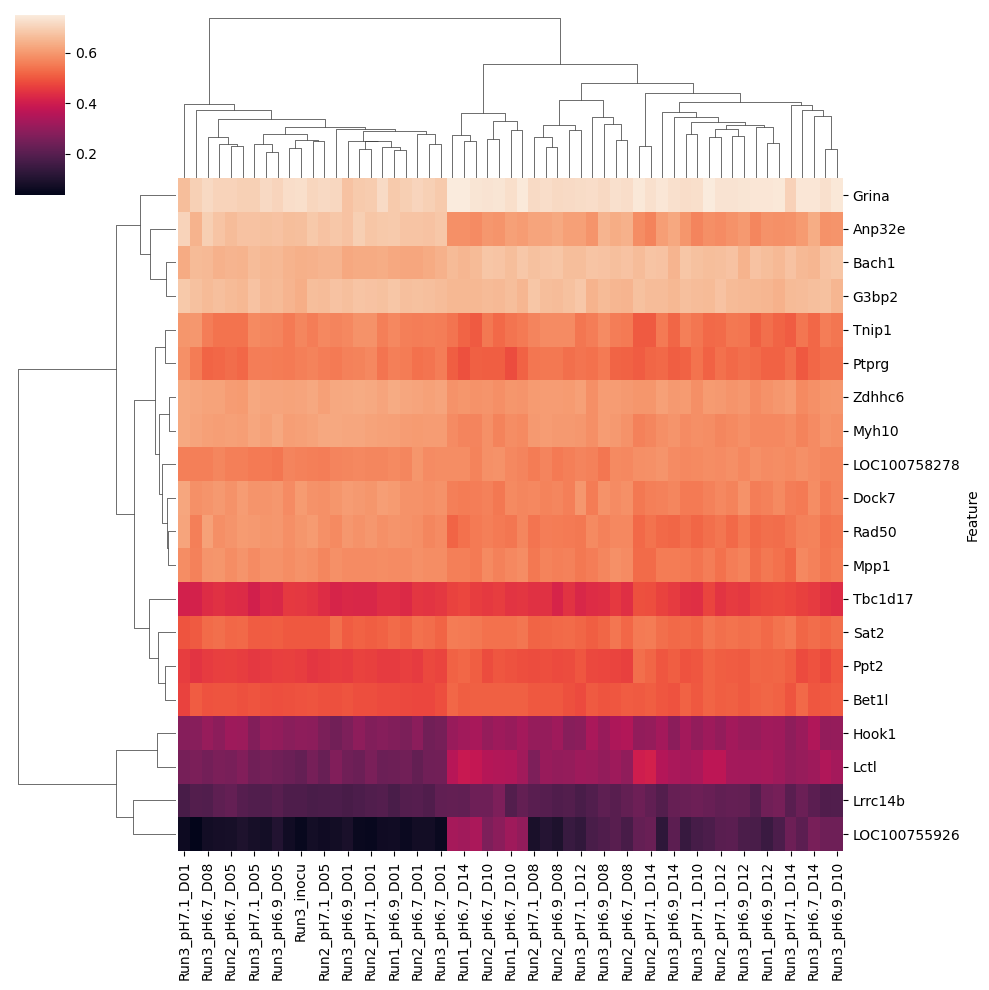

In [62]:
ranked_file = os.path.join(output_dir, "Ranked_Genes.csv")
ranked_features = pd.read_csv(ranked_file, index_col=False)
top_n = ranked_features['ID'].tolist()[:n]
#top_n
sns.clustermap(tx_norm.loc[top_n])

## Top Proteins

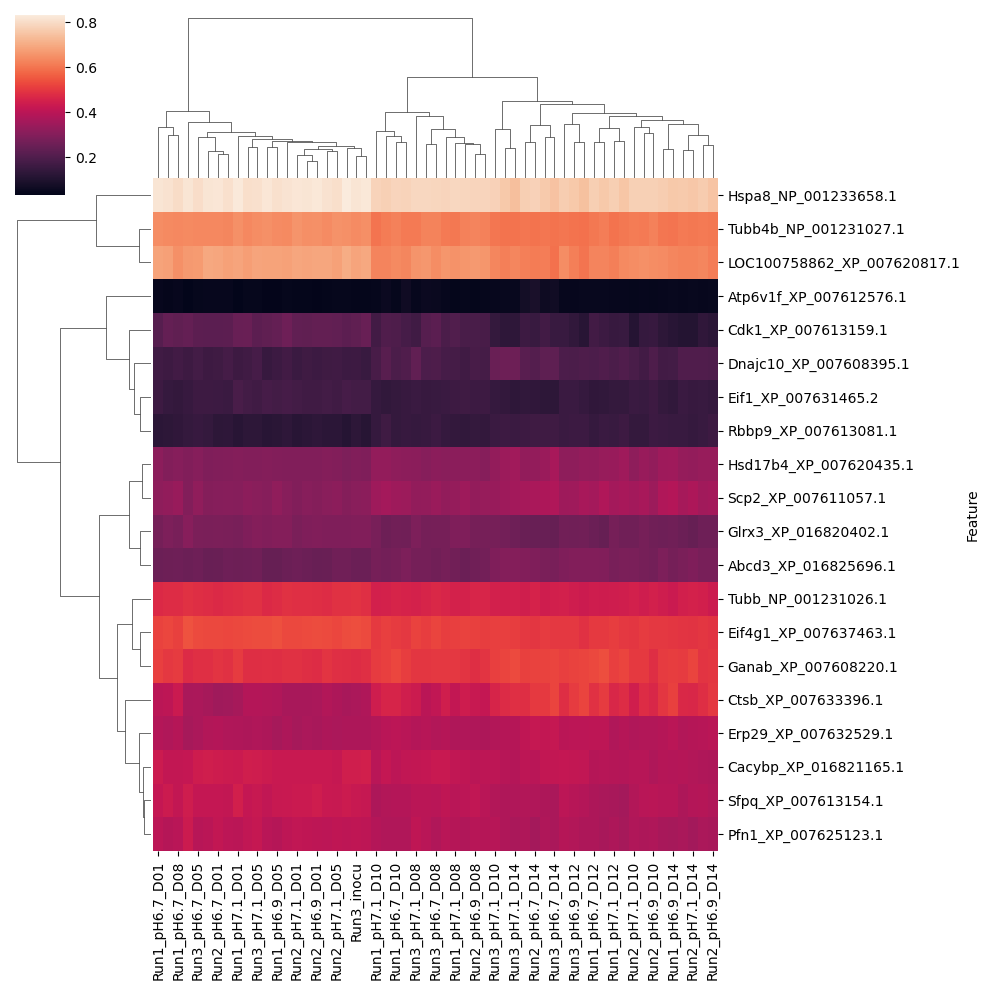

In [63]:
ranked_file = os.path.join(output_dir, "Ranked_Proteins.csv")
ranked_features = pd.read_csv(ranked_file, index_col=False)
top_n = ranked_features['ID'].tolist()[:n]
#top_n
sns.clustermap(px_norm.loc[top_n])

## Top Metabolites

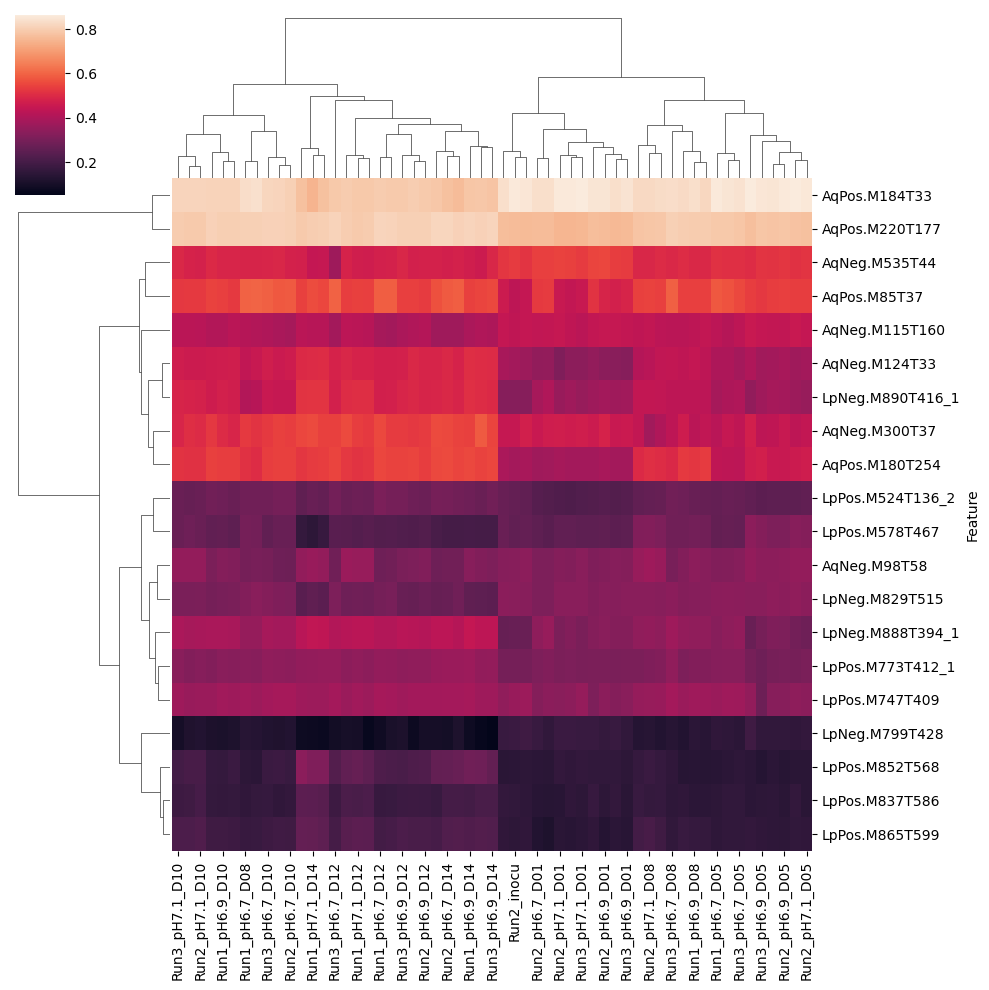

In [64]:
ranked_file = os.path.join(output_dir, "Ranked_Metabolites.csv")
ranked_features = pd.read_csv(ranked_file, index_col=False)
top_n = ranked_features['ID'].tolist()[:n]
#top_n
sns.clustermap(mx_norm.loc[top_n])

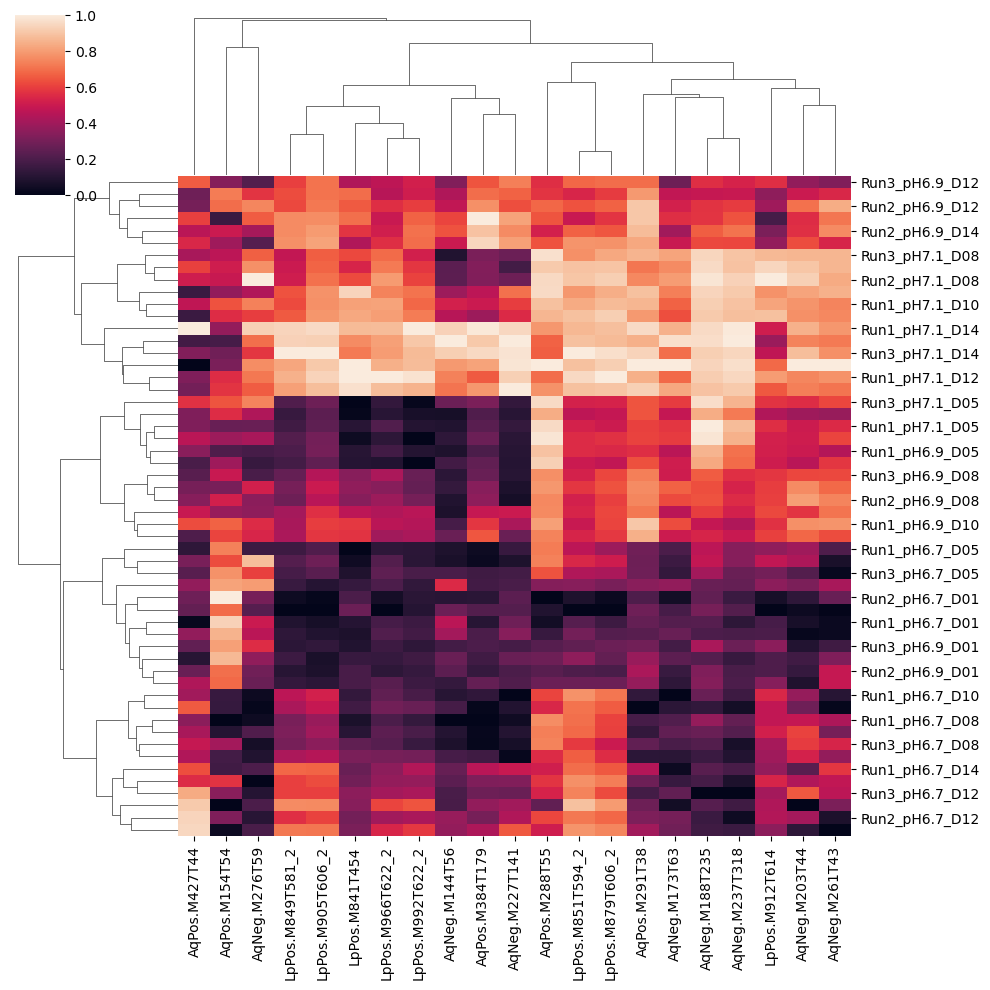

In [114]:
# clustering the rescaled metabolite expression values for top metabolites
scaler = preprocessing.MinMaxScaler()
mx_top_norm = pd.DataFrame(scaler.fit_transform(mx_top))
mx_top_norm.columns = mx_top.columns.values
mx_top_norm.index = mx_top.index
#mx_top_norm
sns.clustermap(mx_top_norm)
#plt.tight_layout()
plt.savefig("CHO_Mx_TopFeatures.png", dpi=300)